<a href="https://colab.research.google.com/github/Kimuksung/bigdata/blob/master/%EA%B8%B0%EB%B3%B8_%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망 Newlearn network 기본 개념

- Newlearn network : 방향이 있는 그래프로써 information propagation 이 한 방향으로 진행된다. 양방향으로 진행된다면 information propagation이 recursive에 빠져 복잡해진다. 이를 RNN , LSTM 이라 하며, 최근 자연어 처리 및 시계열에 많이 사용되고 있다.

- feed forward network : layer layer 사이에만 edge로 연결 / layer1 -> layer4 X
Weight 와 Bias를 바탕으로 하나의 node가 activation에 맞추어 활성화 되면 해당 값을 전달하는 방식

- 실제 뉴런에서는 Newlearn 각각의 Newlearn이 activate 되어 결과를 전달하여 최종 결정을 내리는 뉴런의 activate 값에 의해 행동된다.



#Activation function

Activation[ X1W1 + .. + XnWn + b]

<img src="https://i.ibb.co/QXKpY9F/activation-function.png" alt="activation-function" border="0">
<br/>
<img src="https://i.ibb.co/yBGpjxL/linear.png" alt="linear" border="0">
<img src="https://i.ibb.co/sKKPpW1/sigmoid.png" alt="sigmoid" border="0">
<img src="https://i.ibb.co/6yCm9tV/relu.png" alt="relu" border="0">

# Convex function
<img src="https://i.ibb.co/1TsD5sJ/convex-example.png" alt="convex-example" border="0">

## <font color="red"> 1. 집합 X에서 점과 점을 잡고 어떤 선을 그엇을 때, 그 선이 포함하는 점조차도 집합 X에 포함된다. </font>

- convex할 때 상수를 더하거나 곱해도 convex하고, 어떤 convex집합 X, Y가 만났을 때, 그 교집합도 convex하다

<img src="https://i.ibb.co/YtDyV9m/convexchange.png" alt="convexchange" border="0">

- 정의에 의해 위 그래프는 아래 그래프와 같다.

<img src="https://i.ibb.co/crf1kJ1/convexchange2.png" alt="convexchange2" border="0">

- convex와 strictly convex의 차이는 등호(=)의 차이

## <font color="red"> 2. 실제함수 f가 convex할 경우, αf(x) 또한 convex이며 α >= 0입니다. </font>

<img src="https://i.ibb.co/jZxGscp/convex-define.png" alt="convex-define" border="0">

<font color="red">1.  convex하다면 접선 위에 있어야 한다는 것입니다.</font>

<font color="red">2. 실제 함수 f(x)의 2차미분값이 0보다 크거나 같아야 convex하다는 것입니다. </font>

#<font color="red">Model이 Convex 하다는 것을 증명해야 gradient descent 방식을 사용가능하다.<font color="red">

cost function 중에서 convex 한것들
- L2 loss 
- log loss
- L1 regularization
- L2 regularization

# Back propagation

- activation function이 non-linear하며 layer끼리 연결되어 weight optimization은 non-convex하다. 따라서 일반적인 경우 최적의 optimize를 찾는 것이 매우 어렵기 때문에 최선의 방법이 gradient 기법 사용

- 모든 optimization 문제는 target function이 정의되어야 풀 수 있다. 따라서 loss function을 이용하여 target output을 맞추는데 초점을 두어 minimize한다.

- backpropagation algorithm은 chian rule을 이용하면 매우 간단히 만들 수 있다.

- sigmoid function 에서 0과 1에 가까운 값에서는 backpropagation이 제대로 전달되지 않는 vanishing gradient 문제가 발생한다.

<img src="https://i.ibb.co/YW2tGTq/backpropagation.png" alt="backpropagation" border="0">

# loss function

<img src="https://i.ibb.co/0Dts6tV/loss-function.png" alt="loss-function" border="0">

# Optimizer
- gd = full batch
- convex function에서 최저점에 가깝게 접근하도록 만들었다.
- learningrate 핵심 parameter로 곱하여 사용

- sgd = mini batch / gd를 보완(시간을 줄인다.)

 dataset에서 무작위로 균일 선택하여 각 단계의 gd를 구한다.(최저점을 구할 가능성이 높지만 보장 X)

<img src="https://i.ibb.co/mFj4Ww0/optimizer.png" alt="optimizer" border="0">

# Algorithm



<img src="https://i.ibb.co/Pg7xD45/backpropagation-algo.png" alt="backpropagation-algo" border="0">

<img src="https://i.ibb.co/wYcrQLS/backpropagation-algo1.png" alt="backpropagation-algo1" border="0">

<img src="https://i.ibb.co/vYMzc9q/backpropagation-algo2.png" alt="backpropagation-algo2" border="0">

#overfitting
  
overfitting : 학습을 하다보면 train loss는 점차 줄어들기 마련인데, 학습을 과하게 하다보면 세세한 영역도 학습하기 시작하여 원래 목표와는 어긋나는 경우가 발생
이를 방지하기 위해 train loss 와 val loss가 둘다 감소하면 underfitting / train loss가 감소 , val loss가 증가하면 overfitting이라 한다.

- 원인

1.   훈련데이터 적은 경우, 가중치가 큰 경우

2.   Layer, Node 많은 모델(표현력이 높은 모델)

- 해결 방안


1.   가중치 감소(큰 가중치에 대한 패널티 부과 방법
 ) -> L2법칙(Ridge) : cost + 1/2λW2
2.   드롭아웃 : 훈련 시 은닉층의 뉴런 무작위 삭제, 신호 전달 차단



<img src="https://i.ibb.co/6g2TTbM/overfitting1.png" alt="overfitting1" border="0">
<img src="https://i.ibb.co/ctBYBrN/overfitting2.png" alt="overfitting2" border="0">
<img src="https://i.ibb.co/vw5BVLC/overfitting3.png" alt="overfitting3" border="0">

# Norm

p = Norm 의 차수

## L1 Norm 

<img src="https://i.ibb.co/cwtVYHB/L1norm.png" alt="L1norm" border="0">

## L2 Norm

<img src="https://i.ibb.co/HDVZXv6/L2norm.png" alt="L2norm" border="0">

## Ex) ( 0 , 0 ) 에서 ( 6 , 6 ) 을 간다할 때에

- 초록색은 L2 나머지는 L1

- L1의 파랑색은 feature를 나타내어 유용하게 사용

<img src="https://i.ibb.co/gwx4Hcw/L1vsL2.png" alt="L1vsL2" border="0">

## Loss

<img src="https://i.ibb.co/VNNn9cQ/L1-loss.png" alt="L1-loss" border="0">

<img src="https://i.ibb.co/XbCgXR0/L2-loss.png" alt="L2-loss" border="0">



# Regularization

- 정규화 ,  일반화 => model 복잡도에 따른 penalty =>  overfitting / generation 도움

## 1. L1 regularization
<img src="https://i.ibb.co/7t9KFpJ/l1-regular.png" alt="l1-regular" border="0">

## 2. L2 regularization
<img src="https://i.ibb.co/09KXp2P/l2-regular.png" alt="l2-regular" border="0">

## 3. DropOut
-  Layer의 Unit 중에서 몇개를 제외하고 학습을 시켜 의존도를 덜어낸다.

## 4. EarlyStopping
- 학습을 하다 loss가 감소하지 않는다면, 더 좋은 modeling이 아님으로 끝낸다.

용어 정리
- bucketing : continous data -> 일정 범위에 따라 categorial data
- convolution : 2가지의 function이 혼합 ( filter + input ) -> convolution newlearn network
- dense layer : fully connected layer
- multiple dense layer : DNN / 비선형성을 가지고 있다.
- deep model : non-linear model
- wide model : linear model
- epoch : all data set 한번씩 확인한 단계
- regularization(일반화) : modeling을 통한 predict 능력
- log-odds : 어떤 event가 일어날 가능성 log / sigmoid reverse function
ex) 성공 p = 0.9 실패 1 - p = 0.1 -> probability = p / (1-p) = 9 -> log(9) = 2.2

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [=============================

<function matplotlib.pyplot.show>

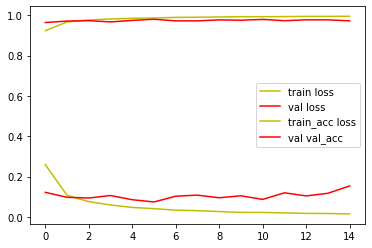

In [1]:
'''

    Tensorflow 2.0 Keras + MNIST( 0 ~ 9 ) + flatten layer


first case : one dimesion (28 x 28 ) -> 768

second case : 28 x 28 -> Flatten

'''

import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Y 변수 전처리
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets.mnist import load_data

# x, y data
(x_train , y_train) , ( x_val , y_val) = load_data() 
x_train.shape # (60000, 28, 28)
y_train.shape # (60000,)

# data normalize & 2d
x_train = x_train / 255.
x_val = x_val / 255.
x_val.shape # (10000, 28, 28)

#x_train = x_train.reshape(-1,784)
#x_val = x_val.reshape(-1,784)


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_val.shape

# 2. Keras Model 생성
model = Sequential()

# 3. model layer
# =============================================================================
# model.add(Dense( 128  , input_shape = (784,) , activation = 'relu')) # hidden layer = [ 784 , 128]
# model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
# model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
# model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]
# =============================================================================
input_shape = (28 , 28)
model.add(Flatten(input_shape = input_shape )) # flatten layer
model.add(Dense( 128  , activation = 'relu')) # hidden layer = [ 784 , 128]
model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]


# 4. model compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# layer check
model.summary()

# 5. model training
model_fit = model.fit( x= x_train, y=y_train , epochs=15 , verbose=1 , validation_data = (x_val , y_val))

# 5.5 model history
model_fit.history.keys()
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

import matplotlib.pyplot as plt
plt.plot(train_loss , label = 'train loss',color = 'y' )
plt.plot(val_loss , label = 'val loss' , color='r')
plt.legend(loc='best')
plt.show


plt.plot(train_acc , label = 'train_acc loss',color = 'y' )
plt.plot(val_acc , label = 'val val_acc' , color='r')
plt.legend(loc='best')
plt.show

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2493 - accuracy: 0.9267 - val_loss: 

<function matplotlib.pyplot.show>

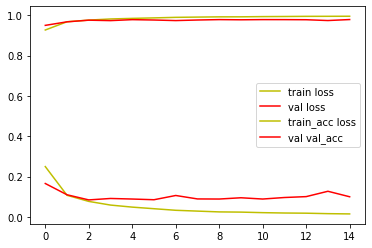

In [2]:
'''

   Keras + MNIST( 0 ~ 9 ) + flatten layer + history + drop out


first case : one dimesion (28 x 28 ) -> 768

second case : 28 x 28 -> Flatten

'''

import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Y 변수 전처리
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten ,Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets.mnist import load_data

# x, y data
(x_train , y_train) , ( x_val , y_val) = load_data() 
x_train.shape # (60000, 28, 28)
y_train.shape # (60000,)

# data normalize & 2d
x_train = x_train / 255.
x_val = x_val / 255.
x_val.shape # (10000, 28, 28)

#x_train = x_train.reshape(-1,784)
#x_val = x_val.reshape(-1,784)


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_val.shape

# 2. Keras Model 생성
model = Sequential()

# 3. model layer
# =============================================================================
# model.add(Dense( 128  , input_shape = (784,) , activation = 'relu')) # hidden layer = [ 784 , 128]
# model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
# model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
# model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]
# =============================================================================
input_shape = (28 , 28)
model.add(Flatten(input_shape = input_shape )) # flatten layer
model.add(Dense( 128  , activation = 'relu')) # hidden layer = [ 784 , 128]
Dropout(rate = 0.5 )
model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
Dropout(rate = 0.3 )
model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
Dropout(rate = 0.3 )
model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]


# 4. model compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# layer check
model.summary()

# 5. model training
model_fit = model.fit( x= x_train, y=y_train , epochs=15 , verbose=1 , validation_data = (x_val , y_val))

# 5.5 model history
model_fit.history.keys()
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

import matplotlib.pyplot as plt
plt.plot(train_loss , label = 'train loss',color = 'y' )
plt.plot(val_loss , label = 'val loss' , color='r')
plt.legend(loc='best')
plt.show


plt.plot(train_acc , label = 'train_acc loss',color = 'y' )
plt.plot(val_acc , label = 'val val_acc' , color='r')
plt.legend(loc='best')
plt.show

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9249 - val_loss: 

<function matplotlib.pyplot.show>

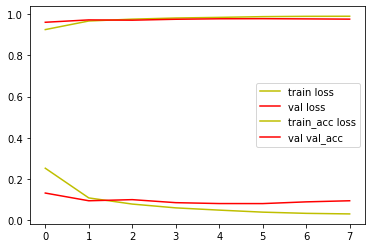

In [3]:
'''

   Keras + MNIST( 0 ~ 9 ) + flatten layer + history + drop out + earlystopping


first case : one dimesion (28 x 28 ) -> 768

second case : 28 x 28 -> Flatten

'''

import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Y 변수 전처리
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten ,Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.callbacks import EarlyStopping

# x, y data
(x_train , y_train) , ( x_val , y_val) = load_data() 
x_train.shape # (60000, 28, 28)
y_train.shape # (60000,)

# data normalize & 2d
x_train = x_train / 255.
x_val = x_val / 255.
x_val.shape # (10000, 28, 28)

#x_train = x_train.reshape(-1,784)
#x_val = x_val.reshape(-1,784)


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_val.shape

# 2. Keras Model 생성
model = Sequential()

# 3. model layer
# =============================================================================
# model.add(Dense( 128  , input_shape = (784,) , activation = 'relu')) # hidden layer = [ 784 , 128]
# model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
# model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
# model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]
# =============================================================================
input_shape = (28 , 28)
model.add(Flatten(input_shape = input_shape )) # flatten layer
model.add(Dense( 128  , activation = 'relu')) # hidden layer = [ 784 , 128]
Dropout(rate = 0.5 )
model.add(Dense( 64  , activation = 'relu'))  # hidden layer = [ 128 , 64 ]
Dropout(rate = 0.3 )
model.add(Dense( 32  , activation = 'relu'))  # hidden layer = [ 64 , 32 ]
Dropout(rate = 0.3 )
model.add(Dense( 10 , activation = 'softmax')) # output layer = [ 32 , 3]


# 4. model compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# layer check
model.summary()

# 5. model training
callback = EarlyStopping(monitor = "val_loss" , patience = 2)

model_fit = model.fit( x= x_train, y=y_train , epochs=15 , verbose=1 , 
                      validation_data = (x_val , y_val),
                      callbacks = [callback]) 
# callback : 특정 method -> 또 다른 metehod 호출 기

# 5.5 model history
model_fit.history.keys()
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

import matplotlib.pyplot as plt
plt.plot(train_loss , label = 'train loss',color = 'y' )
plt.plot(val_loss , label = 'val loss' , color='r')
plt.legend(loc='best')
plt.show


plt.plot(train_acc , label = 'train_acc loss',color = 'y' )
plt.plot(val_acc , label = 'val val_acc' , color='r')
plt.legend(loc='best')
plt.show


출처:
http://sanghyukchun.github.io/74/

https://seamless.tistory.com/38

https://www.solver.com/convex-optimization

https://light-tree.tistory.com/125

https://hwiyong.tistory.com/8?category=805068